In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from numpy import array as arr
from ipywidgets import interact
from IPython.display import clear_output

In [3]:
def rbf(x, xp, e):
    return np.exp(-1 * e**2 * (x-xp)**2)

In [4]:
def ddxp(x, xp, e):
    return np.exp(-1 * e**2 * (x-xp)**2) * (-2 * e**2 * (x-xp)) 

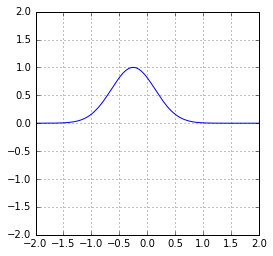

In [6]:
def one(t1=-1.0, e=1.0):
    X = np.linspace(-2, 2, 200)
    Y = [rbf(x, arr([t1]), e) for x in X]
    
    plt.gca().set_aspect('equal')
    plt.axis([-2,2,-2,2])
    f = plt.plot(X, Y)
    plt.grid()
    
interact(one, t1=(-1,1,.05), e=(.1, 4.0, .1))

<function __main__.mix>

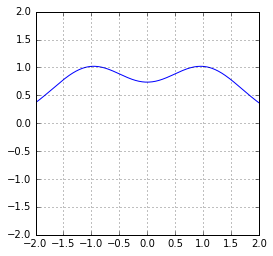

In [7]:
def mix(t1=-1.0, t2=1.0, e=1.0):
    X = np.linspace(-2, 2, 200)
    Y1 = np.array([rbf(x, arr([t1]), e) for x in X])
    Y2 = np.array([rbf(x, arr([t2]), e) for x in X])
    
    plt.gca().set_aspect('equal')
    plt.axis([-2,2,-2,2])
    f = plt.plot(X, np.add(Y1, Y2))
    plt.grid()
    
interact(mix, t1=(-1,1,.05), t2=(-1,1,.05), e=(.1, 4.0, .1))

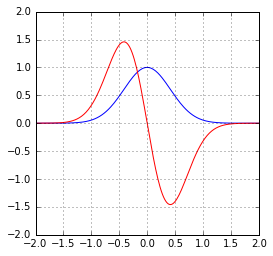

In [9]:
# Derivative w.r.t. xp

def one(t1=0, e=1.0):
    X = np.linspace(-2, 2, 200)
    Y = [rbf(x, arr([t1]), e) for x in X]
    dY = [ddxp(x, arr([t1]), e) for x in X]
    
    plt.gca().set_aspect('equal')
    plt.axis([-2,2,-2,2])
    f = plt.plot(X, Y, c='b')
    plt.plot(X, dY, c='r')
    plt.grid()
    
interact(one, t1=(-1,1,.05), e=(.1, 4.0, .1))

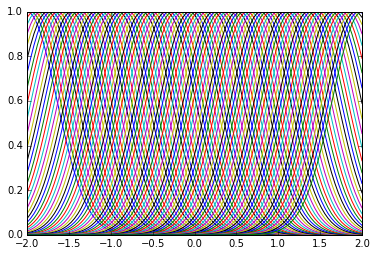

In [48]:
# Pick centers, learn weights using SGD

# Epsilon
e = 2.0

# Centers
C = np.linspace(-2, 2, 100)

# Weights
W = np.ones_like(C)

# Function approximator
def fa(x):
    s = 0.0
    for i, w in enumerate(W):
        s += w * rbf(x, C[i], e)
    return s

def dfdw(x):
    return np.array([rbf(x, c, e) for c in C])

def vis():
    X = np.linspace(-2, 2, 100)
    Y = np.array([fa(x) for x in X])

    plt.gca().set_aspect('equal')
    f = plt.plot(X, Y)
    plt.grid()
    
    
# Visualize all the individual gaussians

def vis_g():
    for i, w in enumerate(W):
        X = np.linspace(-2, 2, 100)
        Y = np.array([w * rbf(x, C[i], e) for x in X])
        plt.plot(X, Y)
        
def vis_f(f):
    X = np.linspace(-2, 2, 100)
    Y = np.array([f(x) for x in X])
    plt.plot(X, Y, c='r')
        
vis_g()

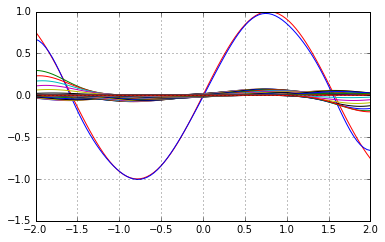

In [53]:
# Train the weights!

def true_f(x):
    return np.sin(2*x)

for i in range(1000):
    x = np.random.random_sample() * 4.0 - 2.0
    t = true_f(x)
    W -= 0.1 * (fa(x) - t) * dfdw(x)
    
    if i % 100 == 0:
        clear_output(wait=True)
        vis_f(true_f)
        vis()
        vis_g()
        plt.show()